<div align="center"> 

# Investigating Oil prices and Big Tech. Companies Stock Market 

<p>Between 2001-1-1 - 2023-12-31</p>
</div>

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

## **1.** Problem Statement

In this reserach, the stock prices of major tech companies (such as Apple, Microsoft, Google, Amazon, and META) and oil prices over the period spanning from January 2001 to December 2023 are investigated. By examining historical data for both sectors, the aim is to uncover insights into how changes in oil prices impact the financial performance of big tech companies, and vice versa.
The datasets would include the stock market data for:
- META
- AMazon
- Google
- Apple

## **2.** Solution Pipeline
1. Gather Data
2. Asses Data
3. Clean Data
4. Store Data
5. Answering Research Questions

### Neccessary Imports

In [1]:
## Run this cell to successfully run this notebook
## !pip install yfinance

In [2]:
import requests
import pandas as pd
import yfinance as yf
import requests
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Gather data

In this section, data using two different (data gathering methods) are extractand and then combined. Two different types of data-gathering methods are use:
- Programmatically downloading files
- Gathering data by accessing APIs

### **3.1.** Gathering Data Methods and Code

In this project, two types of data gathering are use: 
- Programmatically downloading files
- Gathering data by accessing APIs

Each of the datasets have at least two variables, and have greater than 500 data samples within.

#### **Dataset 1**: Oils and Petroleum dataset 

##### *About this dataset*

**Type:** JSON response

**Method:** The data was gathered using the "by accessing APIs" method from https://api.eia.gov/v2/petroleum/pri/spt/data/

**Dataset variables:**

| Column Name | Description |
|---|---|
| period |  date associated with the data point |
| duoarea | identifier for a specific geographical area |
| area-name | area name |
| product | identifier for the specific petroleum product |
| product-name | name of the product |
| process | identifier for the specific process |
| process-name | The name of the process used |
| series | identifier for the specific data series |
| series-description | descriptive text name or label for the data |
|value| The price|
|units| unit of the price |

##### *Gathering by API*

In [3]:
## Gather the data using the "Gather data by accessing APIs" method from https://api.eia.gov
api_key = config.EIA_API_KEY
url = f'https://api.eia.gov/v2/petroleum/pri/gnd/data/?'

params = {
    'api_key':api_key,
    "frequency": "weekly",
    "data[0]": "value",
    "facets": {},
    "start": "2005-01-01",
    "end": "2023-12-31",
    "offset": 0,
    "length": 5000
}

response = requests.get(url, params=params)
data = response.json()
oil_data =pd.DataFrame(data['response']['data'])
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
562,2010-09-20,R1X,PADD 1A,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R1X_DPG,New England (PADD 1A) No 2 Diesel Ultra Low Su...,2.997,$/GAL
2534,2016-04-18,YMIA,MIAMI,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_YMIA_DPG,"Miami, FL All Grades All Formulations Retail G...",2.435,$/GAL
2134,2015-02-02,R1X,PADD 1A,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R1X_DPG,New England (PADD 1A) All Grades All Formulati...,2.242,$/GAL
1514,2014-05-12,R10,PADD 1,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R10_DPG,East Coast All Grades All Formulations Retail ...,3.779,$/GAL
108,2021-12-06,R1Z,PADD 1C,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R1Z_DPG,Lower Atlantic (PADD 1C) No 2 Diesel Ultra Low...,3.556,$/GAL


In [4]:
oil_data.shape

(5000, 11)

> The gathered dataset have 5000 rows and 11 features.

In [5]:
oil_data.to_csv('data/oil_data_api.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

#### **Dataset 2**: Stocks Dataset

##### *About this dataset*
**Type:** Pandas.DataFrame

**Method:** The data was gathered using the "Programmatically downloading files" method from Yahoo Finance using the yfinance library

**Dataset variables:**

| Column Name | Description |
|---|---|
| Date | date associated with the data point |
| Open | The opening price of the stock on that date. |
| High | The highest price reached by the stock on that date. |
| Low | The lowest price reached by the stock on that date. |
| Close | The closing price of the stock on that date. |
| Adj Close | The adjusted closing price, adjusted for dividends and splits. |
| Volume | The number of shares traded on that date. |

##### *Gathering by Programmatically Downloading*

In [6]:
## 2nd data gathering was downloaded programitticallly from Yahoo Finance using the yfinance library
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = yf.download(companies, start='2005-01-01', end='2023-12-31')
stocks_data.reset_index(inplace=True)
stocks_data.sample(5)

[*********************100%%**********************]  5 of 5 completed


Price        Date  Adj Close                                              \
Ticker                  AAPL       AMZN      GOOGL       META       MSFT   
896    2008-07-25   4.895171   3.915500  12.297698        NaN  19.110313   
2299   2014-02-21  16.500769  17.337999  30.090340  68.449341  32.103741   
2135   2013-06-27  12.145449  13.877500  21.923538  24.609428  28.625465   
1237   2009-12-01   5.947461   6.925000  14.744590        NaN  22.679029   
1309   2010-03-17   6.767248   6.567000  14.136929        NaN  22.496574   

Price       Close                                   ...       Open           \
Ticker       AAPL       AMZN      GOOGL       META  ...       AAPL     AMZN   
896      5.790000   3.915500  12.311812        NaN  ...   5.728571   3.9815   
2299    18.758928  17.337999  30.124874  68.589996  ...  19.028214  17.6220   
2135    14.063571  13.877500  21.948700  24.660000  ...  14.258929  13.9590   
1237     7.034643   6.925000  14.761512        NaN  ...   7.222857   6.8470   
1309     8.004286   6.567000  14.153153        NaN  ...   8.032143   6.6205   

Price                                       Volume                        \
Ticker      GOOGL       META       MSFT       AAPL       AMZN      GOOGL   
896     12.174424        NaN  25.639999  633637200  183014000  127212660   
2299    30.225475  69.690002  37.939999  278784800   84200000   74417508   
2135    21.991993  24.240000  34.520000  337246000   50390000   76982940   
1237    14.717968        NaN  29.520000  465763200  193152000   92719188   
1309    14.221722        NaN  29.500000  450956800   87176000  132731136   

Price                         
Ticker        META      MSFT  
896            NaN  58682300  
2299    70932400.0  38021300  
2135    34694100.0  28993100  
1237           NaN  49904200  
1309           NaN  50385700  

[5 rows x 31 columns]

In [7]:
stocks_data.shape

(4781, 31)

> The gathered data has 5785 data points and 31 features.

In [8]:
stocks_data.to_csv('data/stock_data.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

## 4. Assess data
Now that we have gathered the datasets, let's assess the dataset for data quality and structural issues. In this section, the data is assessed according to data quality and tidiness metrics. Where two data quality issues and two tidiness issues are assessed. Each are assess visually and programmatically, then the issue is described. Justifications for the methods used for the assessment are also included.
Issues assessed:
- Completness
- Validity
- Columns Names
- Inexing of the data

### **Completeness (Quality Issue #1):**
This is the issue of having missing data in the datsets. It affects good analysis and will be assessed for both datasets programmatically and visualy.

#### **Stocks Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

In [9]:
nan = ['NA','NaN','-', '0',0, np.nan] ## possible null vlaues

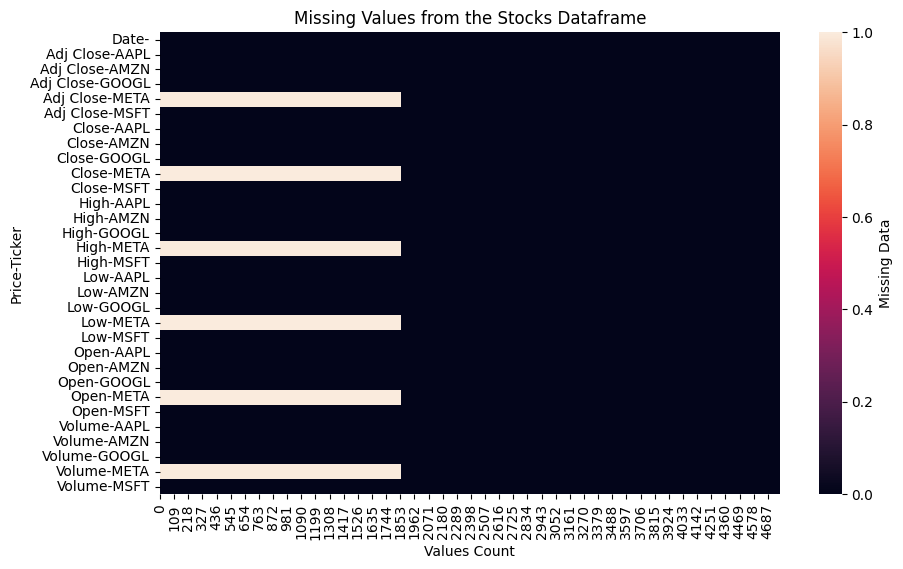

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Stocks Dataframe')
plt.xlabel('Values Count');

> Almost half of the data from the META company are missing. The other missing values are from Google company.

##### Inspecting the dataframe programmatically
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos.

In [11]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            4781 non-null   datetime64[ns]
 1   (Adj Close, AAPL)   4781 non-null   float64       
 2   (Adj Close, AMZN)   4781 non-null   float64       
 3   (Adj Close, GOOGL)  4781 non-null   float64       
 4   (Adj Close, META)   2923 non-null   float64       
 5   (Adj Close, MSFT)   4781 non-null   float64       
 6   (Close, AAPL)       4781 non-null   float64       
 7   (Close, AMZN)       4781 non-null   float64       
 8   (Close, GOOGL)      4781 non-null   float64       
 9   (Close, META)       2923 non-null   float64       
 10  (Close, MSFT)       4781 non-null   float64       
 11  (High, AAPL)        4781 non-null   float64       
 12  (High, AMZN)        4781 non-null   float64       
 13  (High, GOOGL)       4781 non-null   float64     

> While the range index is from 0 to 4781, some the columns arn't complete such as (Adj Close, GOOGL), (Adj Close, META), (Close, GOOGL), (Close, META),  (High, GOOGL), (High, META),  (Low, GOOGL),  (Low, META), (Open, GOOGL),  (Open, META),  (Volume, GOOGL), (Volume, META) and (Volume, MSFT).
> These missing data are specifically in data regarding the Google, and the META big tech companies.

In [12]:
stocks_data.isna().sum().sort_values(ascending=False) 

Price      Ticker
Open       META      1858
Volume     META      1858
Low        META      1858
Adj Close  META      1858
High       META      1858
Close      META      1858
Open       GOOGL        0
Low        MSFT         0
Open       AAPL         0
           AMZN         0
Date                    0
Low        AMZN         0
Open       MSFT         0
Volume     AAPL         0
           AMZN         0
           GOOGL        0
Low        GOOGL        0
High       MSFT         0
Low        AAPL         0
Adj Close  AAPL         0
High       GOOGL        0
           AMZN         0
           AAPL         0
Close      MSFT         0
           GOOGL        0
           AMZN         0
           AAPL         0
Adj Close  MSFT         0
           GOOGL        0
           AMZN         0
Volume     MSFT         0
dtype: int64

> There are 1858 missing records from the META Datasets.

#### **Oil Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

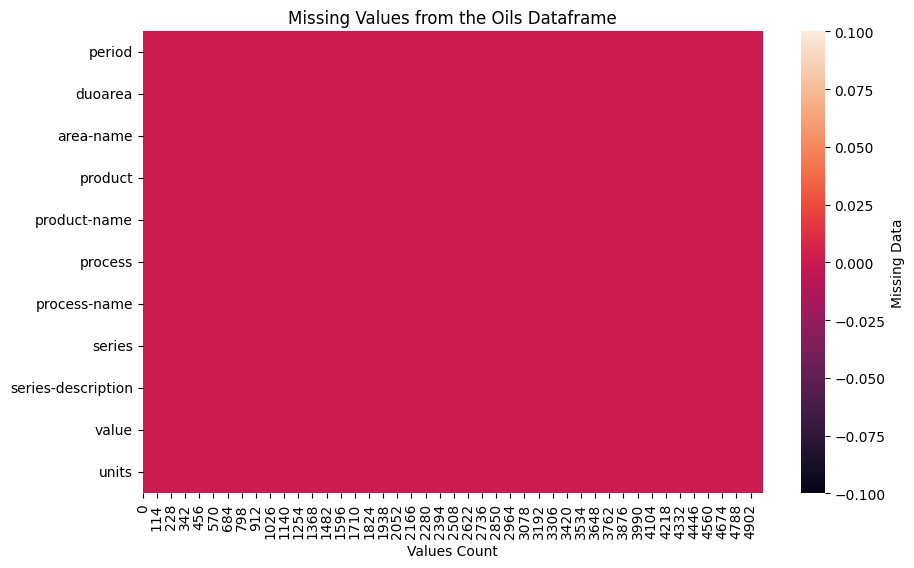

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(oil_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Oils Dataframe')
plt.xlabel('Values Count');

> The only column that has missing values in the oils dataframe is the area-name. It seems to have missing values alongside diffrent dates.

##### *Inspecting the dataframe programmatically*
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos. However, some missing values wesn't detected using these methods so there had to use the `.isin()` method to check if there are missing values programmatically.

In [14]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              5000 non-null   object
 1   duoarea             5000 non-null   object
 2   area-name           5000 non-null   object
 3   product             5000 non-null   object
 4   product-name        5000 non-null   object
 5   process             5000 non-null   object
 6   process-name        5000 non-null   object
 7   series              5000 non-null   object
 8   series-description  5000 non-null   object
 9   value               5000 non-null   object
 10  units               5000 non-null   object
dtypes: object(11)
memory usage: 429.8+ KB


> The data have 0 to 4999 indices, and all the columns non-null counts are full except the value column it has three NAN values.

In [15]:
oil_data.sample(5) ## take a sample of 5

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
217,2018-02-05,R20,PADD 2,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R20_DPG,Midwest No 2 Diesel Ultra Low Sulfur (0-15 ppm...,3.044,$/GAL
3265,2014-03-17,SCO,COLORADO,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SCO_DPG,Colorado All Grades All Formulations Retail Ga...,3.652,$/GAL
2970,2008-11-03,YDEN,DENVER,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_YDEN_DPG,Denver All Grades All Formulations Retail Gaso...,2.423,$/GAL
2156,2018-11-05,R1X,PADD 1A,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R1X_DPG,New England (PADD 1A) All Grades All Formulati...,2.849,$/GAL
2140,2015-12-14,R1X,PADD 1A,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R1X_DPG,New England (PADD 1A) All Grades All Formulati...,2.211,$/GAL


> However with further looking, it was noticed that there are NA values used to presnet the null values.

In [16]:
oil_data.isin(nan).sum() ## to check if some values are not detected using isna

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

> In the oil dataset there are no NAN values from the area-name column. The other columns doesn't have NA values. 

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the dataset using the `.datatype` attribute of the datasets.

In [17]:
stocks_data.dtypes ## looking into datatypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Close      AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
High       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Low        AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Open       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Volume     AAPL               int64
          

> The datastypes are all valid. Let's take a look into why For the volume some of the columns have integer values.

In [18]:
stocks_data['Date'].sample(5) ## Take a sample of 5

2638   2015-06-26
957    2008-10-21
605    2007-05-31
1447   2010-10-01
3256   2017-12-07
Name: Date, dtype: datetime64[ns]

> The datetime64 is actuualy only the date of the record there is no timestamps.

In [19]:
int_col= list(stocks_data.dtypes[stocks_data.dtypes == 'int64']['Volume'].index) ## take the values where the datatypes are integers
for col in int_col:
    print(stocks_data['Volume',col].sample(5))

1870    401455600
2042    475207600
4293    122848900
1169    324354800
3536    121576000
Name: (Volume, AAPL), dtype: int64
3133     79498000
2556     42784000
1131    139624000
840     130914000
4627     70741100
Name: (Volume, AMZN), dtype: int64
294     357230412
3890     30610000
4662     44297900
4339     34318000
130     335276388
Name: (Volume, GOOGL), dtype: int64
3869    35264500
1600    78600000
3069    14280200
1545    60889000
1185    42428800
Name: (Volume, MSFT), dtype: int64


> The dataset is valid in terms of data types for the integers columns.

##### *Inspecting the dataframe visually*
The visualization used to check for datatypes validity is a summary statics table.

In [20]:
## Inspecting the dataframe visually
stocks_data.describe().T

count                           mean                  min  \
Price     Ticker                                                               
Date                4781  2014-07-01 15:02:04.241790208  2005-01-03 00:00:00   
Adj Close AAPL    4781.0                      43.406251             0.955513   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.617377             4.374109   
          META    2923.0                     157.370234             17.69364   
          MSFT    4781.0                      85.750155            11.263443   
Close     AAPL    4781.0                      45.151456             1.130179   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.666289             4.379129   
          META    2923.0                      157.69362                17.73   
          MSFT    4781.0                      91.896614                15.15   
High      AAPL    4781.0                      45.611048             1.159107   
          AMZN    4781.0                       48.02516                1.315   
          GOOGL   4781.0                      43.102564             4.464464   
          META    2923.0                     159.668765                18.27   
          MSFT    4781.0                      92.781004                15.62   
Low       AAPL    4781.0                      44.649769             1.117857   
          AMZN    4781.0                      46.862393                1.288   
          GOOGL   4781.0                      42.210375             4.318569   
          META    2923.0                     155.638686            17.549999   
          MSFT    4781.0                      90.932192                14.87   
Open      AAPL    4781.0                      45.120857             1.139107   
          AMZN    4781.0                      47.467806               1.3045   
          GOOGL   4781.0                      42.655534             4.386887   
          META    2923.0                      157.61935                18.08   
          MSFT    4781.0                      91.865313                 15.2   
Volume    AAPL    4781.0               403190325.831416           24048300.0   
          AMZN    4781.0               108328400.397406           17626000.0   
          GOOGL   4781.0               115393301.946873            9312000.0   
          META    2923.0                30604724.769073            5467500.0   
          MSFT    4781.0                45513886.467266            7425600.0   

                                  25%                  50%  \
Price     Ticker                                             
Date              2009-10-01 00:00:00  2014-07-02 00:00:00   
Adj Close AAPL               5.748777            20.945791   
          AMZN                 4.7205              16.6425   
          GOOGL             13.190316            27.369587   
          META              80.604355           153.205185   
          MSFT              20.658804            35.504242   
Close     AAPL               6.799643            23.620001   
          AMZN                 4.7205              16.6425   
          GOOGL             13.205455            27.400999   
          META              80.769997           153.520004   
          MSFT              27.690001            41.459999   
High      AAPL               6.881429            23.887501   
          AMZN                 4.7925               16.829   
          GOOGL             13.343343            27.627001   
          META              81.470001           155.589996   
          MSFT                  27.93                41.66   
Low       AAPL               6.738571            23.407499   
          AMZN                 4.6535               16.441   
          GOOGL             13.075075               27.222   
          META              80.154999           151.660004   
          MSFT

> As noticed in the Date columns there is no need for the timestamped column datatype. Will be axtracting the year and month from it as integers after mereg.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the datasets using the `.datatype` attribute of the datasets.

In [21]:
oil_data.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
value                 object
units                 object
dtype: object

> All the datatypes in oil data are seen as objects. But as seen in the sample of the data some are dates and numers.

In [22]:
oil_data.sample(2).T

,2847,4572
period,2006-04-17,2019-07-22
duoarea,YCLE,Y05SF
area-name,CLEVELAND,SAN FRANCISCO
product,EPM0,EPM0
product-name,Total Gasoline,Total Gasoline
process,PTE,PTE
process-name,Retail Sales,Retail Sales
series,EMM_EPM0_PTE_YCLE_DPG,EMM_EPM0_PTE_Y05SF_DPG
series-description,"Cleveland, OH All Grades All Formulations Reta...",San Francisco All Grades All Formulations Reta...
value,2.818,3.733


> So most of the data here are categorical. The value column is a numerical one.

In [23]:
oil_data.nunique()

period                 989
duoarea                 29
area-name               29
product                  4
product-name             4
process                  1
process-name             1
series                  43
series-description      43
value                 2313
units                    1
dtype: int64

> The date column is named period instead of date. Each of the process and the process-name and the units have only one unique value that is, they don't bring a value to the dataset.

##### *Inspecting the dataframe visually*
The inspecting visually is using the summary statistics table.

In [24]:
oil_data.describe().T

,count,unique,top,freq
period,5000,989,2020-08-17,13
duoarea,5000,29,R1X,374
area-name,5000,29,PADD 1A,374
product,5000,4,EPM0,3655
product-name,5000,4,Total Gasoline,3655
process,5000,1,PTE,5000
process-name,5000,1,Retail Sales,5000
series,5000,43,EMM_EPM0_PTE_SCO_DPG,145
series-description,5000,43,Colorado All Grades All Formulations Retail Ga...,145
value,5000,2313,2.853,10


> Note that we have only one unique value for both of the process name and the process columns, they don't bring a value to the dataset.

### **Columns Names: (Tidiness Issue #1):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [25]:
stocks_data.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> The columns names have to converted to the appropriate and by the convintion naming of columns.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [26]:
oil_data.columns

Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description', 'value', 'units'],
      dtype='object')

> The names of these columns would be better mapped for the merging, the column of date is named period. other coulmns could use a more meaningful name and using the convention of columns naming.

### **Indexing (Tidiness Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [27]:
print(stocks_data.index)
stocks_data.columns

RangeIndex(start=0, stop=4781, step=1)


MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> This dataset is multi-indexed. It would be difficult to deal with. Since we have to have one observation per row, let's better take the decision to handle this case into one observation per row.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [28]:
print(oil_data.index)
oil_data.columns

RangeIndex(start=0, stop=5000, step=1)


Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description', 'value', 'units'],
      dtype='object')

> The index of the second dataset is a range index starting from 0 to 5000.

## 5. Clean data
It's time to address the issues found during assessment to clean and polish your data.

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [55]:
## Making copies of the datasets to ensure the raw dataframes are not impacted
oil_data_cleaned = oil_data.copy()
stocks_data_cleaned = stocks_data.copy()

### **Completeness (Quality Issue #1):**

There was missing values in both of the datasets.

#### **Stocks Dataset**
For the stocks datsaets, the method chosen for handling missing values is to use the fillin method using the backward startegy since as shown in the heatmap for misisng values it(missing values) starts from the first index. 

> Justification: *For the META facebook before, there seems to be missing values for some reason, however it was checked if the stock nasdaq name used to be FB so did that affect the way the data was gathered and it turned out to not. FB was created in 2005 and it's supposed to have these stocks too,*

In [56]:
## apply the fill in backward way for META
stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
stocks_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_17520\3280220914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


Price        Date   Adj Close                                                  \
Ticker                   AAPL        AMZN       GOOGL        META        MSFT   
1728   2011-11-10   11.631618   10.539500   14.874821   38.151604   20.656912   
2833   2016-04-06   25.324635   30.104000   38.359474  113.476814   49.155212   
4726   2023-10-12  179.998108  132.330002  138.810684  323.495239  329.285248   
4292   2022-01-20  162.224258  151.667496  133.154678  315.910828  295.095093   
2128   2013-06-18   13.317185   14.088000   22.512201   24.160351   28.923132   

Price        Close                                      ...        Open  \
Ticker        AAPL        AMZN       GOOGL        META  ...        AAPL   
1728     13.757857   10.539500   14.891892   38.230000  ...   14.179643   
2833     27.740000   30.104000   38.403500  113.709999  ...   27.557501   
4726    180.710007  132.330002  138.970001  324.160004  ...  180.070007   
4292    164.509995  151.667496  133.307495  316.559998  ...  166.979996   
2128     15.420357   14.088000   22.538038   24.209999  ...   15.412857   

Price                                                      Volume             \
Ticker        AMZN       GOOGL        META        MSFT       AAPL       AMZN   
1728     10.675000   15.163413   42.049999   26.469999  744752400  100892000   
2833     29.375999   37.891998  112.470001   54.360001  105616400   56998000   
4726    132.169998  141.050003  328.000000  330.570007   56743100   55528600   
4292    156.766006  136.250000  323.899994  309.070007   91420500   71974000   
2128     13.954000   22.238487   24.090000   34.970001  195025600   42922000   

Price                                     
Ticker      GOOGL         META      MSFT  
1728    114621264  573576400.0  32514400  
2833     25312000   20814600.0  21188700  
4726     24765500   20530500.0  19313100  
4292     29908000   16925000.0  35380700  
2128     86589324   36709100.0  28616500  

[5 rows x 31 columns]

In [57]:
## Let's validate the cleaning was successful
stocks_data_cleaned.isin(nan).sum()

Price      Ticker
Date                 0
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

#### **Oil Dataset**
For the oil dataset we have missing values in the values they are only three values so they will be filled by backward method.

In [58]:
## Let's apply the mapping into the area-name column
oil_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
oil_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_17520\179560191.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
1487,2009-10-26,R10,PADD 1,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R10_DPG,East Coast All Grades All Formulations Retail ...,2.719,$/GAL
3592,2005-07-25,R1Z,PADD 1C,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R1Z_DPG,Lower Atlantic (PADD 1C) All Grades All Formul...,2.297,$/GAL
2231,2008-11-10,SNY,NEW YORK,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SNY_DPG,New York All Grades All Formulations Retail Ga...,2.661,$/GAL
386,2011-11-21,R30,PADD 3,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_R30_DPG,Gulf Coast No 2 Diesel Ultra Low Sulfur (0-15 ...,3.903,$/GAL
328,2019-04-15,SCA,CALIFORNIA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PTE,Retail Sales,EMD_EPD2DXL0_PTE_SCA_DPG,California No 2 Diesel Ultra Low Sulfur (0-15 ...,3.967,$/GAL


In [59]:
## Let's validate the cleaning was successful
oil_data_cleaned.isna().sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**
In the stocks dataset the datatypes were accurate, only the datetime only contains teh date so it is storing unnecceray data of 00:00:00 time.

> All the datatypes are valid for the stocks datasets.

> *The decsision will be to extract teh months, years and days after the merge. To make more sense when visualization and answering the reswarch question.*

#### **Oils Dataset**
In the oil datsaet there were all of the datatypes are objects.

In [60]:
## Apply the cleaning strategy which is use teh to_datetime
oil_data_cleaned['period'] = pd.to_datetime(oil_data_cleaned['period'])

In [61]:
## change the datatype of the value column to numerical 
oil_data_cleaned['value'] = pd.to_numeric(oil_data_cleaned['value'])

In [62]:
## to Validate the cleaning was successful used info
oil_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              5000 non-null   datetime64[ns]
 1   duoarea             5000 non-null   object        
 2   area-name           5000 non-null   object        
 3   product             5000 non-null   object        
 4   product-name        5000 non-null   object        
 5   process             5000 non-null   object        
 6   process-name        5000 non-null   object        
 7   series              5000 non-null   object        
 8   series-description  5000 non-null   object        
 9   value               5000 non-null   float64       
 10  units               5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 429.8+ KB


> We can see the period successfully changed into the datetime datatype and the value is changed successfully to float64.

### **Columns Names: (Tidiness Issue #1):**
This issue includes the columns names and renaming to the convention.

#### **Stocks Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [63]:
new_stocks_names = {
    col: ('_'.join([col[0].lower(), col[1].lower()])).replace(' ', '_') if col[0] != 'Date' else 'date'
    for col in stocks_data_cleaned.columns
}
new_stocks_names

{('Date', ''): 'date',
 ('Adj Close', 'AAPL'): 'adj_close_aapl',
 ('Adj Close', 'AMZN'): 'adj_close_amzn',
 ('Adj Close', 'GOOGL'): 'adj_close_googl',
 ('Adj Close', 'META'): 'adj_close_meta',
 ('Adj Close', 'MSFT'): 'adj_close_msft',
 ('Close', 'AAPL'): 'close_aapl',
 ('Close', 'AMZN'): 'close_amzn',
 ('Close', 'GOOGL'): 'close_googl',
 ('Close', 'META'): 'close_meta',
 ('Close', 'MSFT'): 'close_msft',
 ('High', 'AAPL'): 'high_aapl',
 ('High', 'AMZN'): 'high_amzn',
 ('High', 'GOOGL'): 'high_googl',
 ('High', 'META'): 'high_meta',
 ('High', 'MSFT'): 'high_msft',
 ('Low', 'AAPL'): 'low_aapl',
 ('Low', 'AMZN'): 'low_amzn',
 ('Low', 'GOOGL'): 'low_googl',
 ('Low', 'META'): 'low_meta',
 ('Low', 'MSFT'): 'low_msft',
 ('Open', 'AAPL'): 'open_aapl',
 ('Open', 'AMZN'): 'open_amzn',
 ('Open', 'GOOGL'): 'open_googl',
 ('Open', 'META'): 'open_meta',
 ('Open', 'MSFT'): 'open_msft',
 ('Volume', 'AAPL'): 'volume_aapl',
 ('Volume', 'AMZN'): 'volume_amzn',
 ('Volume', 'GOOGL'): 'volume_googl',
 ('Volu

In [64]:
stocks_data_cleaned.columns = stocks_data_cleaned.columns.map(new_stocks_names)

In [65]:
## Validate the cleaning was successful by calling the .columns
stocks_data_cleaned.columns

Index(['date', 'adj_close_aapl', 'adj_close_amzn', 'adj_close_googl',
       'adj_close_meta', 'adj_close_msft', 'close_aapl', 'close_amzn',
       'close_googl', 'close_meta', 'close_msft', 'high_aapl', 'high_amzn',
       'high_googl', 'high_meta', 'high_msft', 'low_aapl', 'low_amzn',
       'low_googl', 'low_meta', 'low_msft', 'open_aapl', 'open_amzn',
       'open_googl', 'open_meta', 'open_msft', 'volume_aapl', 'volume_amzn',
       'volume_googl', 'volume_meta', 'volume_msft'],
      dtype='object')

In [66]:
stocks_data_cleaned.sample(1).T

,774
date,2008-01-31 00:00:00
adj_close_aapl,4.08716
adj_close_amzn,3.885
adj_close_googl,14.105433
adj_close_meta,38.151604
adj_close_msft,23.635649
close_aapl,4.834286
close_amzn,3.885
close_googl,14.121622
close_meta,38.23


> Justification: *It is the best practice to follow the naming conventions of the dataset columns and for ease of use.*
We can see that the names are changed by looking at the head and the columns.

#### **Oil Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [67]:
## axtracting the new names
new_oils_names = {
    'period': 'date',
    'duoarea': 'duoarea_oil',
    'area-name': 'area_name_oil',
    'product': 'oil_product_code',
    'product-name': 'oil_product_name',
    'series': 'oil_series',
    'process-name': 'process_name',
    'process': 'process',
    'series-description': 'oil_series_description',
    'value':'price_oil',
    'units':'units'
}
new_oils_names

{'period': 'date',
 'duoarea': 'duoarea_oil',
 'area-name': 'area_name_oil',
 'product': 'oil_product_code',
 'product-name': 'oil_product_name',
 'series': 'oil_series',
 'process-name': 'process_name',
 'process': 'process',
 'series-description': 'oil_series_description',
 'value': 'price_oil',
 'units': 'units'}

In [68]:
oil_data_cleaned.columns = oil_data_cleaned.columns.map(new_oils_names)

In [69]:
## Validating the cleaning step for renaming to conventional names
oil_data_cleaned.columns

Index(['date', 'duoarea_oil', 'area_name_oil', 'oil_product_code',
       'oil_product_name', 'process', 'process_name', 'oil_series',
       'oil_series_description', 'price_oil', 'units'],
      dtype='object')

> We can see that the new names are applied.

### **Indexing (Tidiness Issue #2):**
The indexing in the dataframes are checked in the assessing and were decided to be simplified from multi-indexing.

> *The renaming of the columns to conventional have actually fixed the problem of multiindexing and simplidied the dataset.*

In [70]:
stocks_data_cleaned.index

RangeIndex(start=0, stop=4781, step=1)

In [71]:
oil_data_cleaned.index

RangeIndex(start=0, stop=5000, step=1)

### **Remove unnecessary variables and combine datasets**

Now let's peform the combination and remove unnecessary variables in the final dataset.

#### **Oil Dataset**
In the oil satasets the process-name and the process and the units have only one unique value, that is they will be dropped because they don't change by the observations.

In [72]:
oil_data_cleaned.drop(columns=['process','process_name','units'],inplace=True)

In [73]:
oil_data_cleaned.columns

Index(['date', 'duoarea_oil', 'area_name_oil', 'oil_product_code',
       'oil_product_name', 'oil_series', 'oil_series_description',
       'price_oil'],
      dtype='object')

> They were validated to be dropped ffrom the cleaned datset.

#### **Combined Dataset**

In [74]:
## combine datasets using merege on the date column
merged_data = pd.merge(oil_data_cleaned, stocks_data_cleaned, on='date')
merged_data.sample(5).T

,2838,3533,753,3265,1689
date,2016-03-07 00:00:00,2013-07-08 00:00:00,2019-07-29 00:00:00,2007-08-27 00:00:00,2011-04-25 00:00:00
duoarea_oil,R20,SMN,R40,R1Z,R50
area_name_oil,PADD 2,MINNESOTA,PADD 4,PADD 1C,PADD 5
oil_product_code,EPM0,EPM0,EPD2DXL0,EPM0,EPM0
oil_product_name,Total Gasoline,Total Gasoline,No 2 Diesel Low Sulfur (0-15 ppm),Total Gasoline,Total Gasoline
oil_series,EMM_EPM0_PTE_R20_DPG,EMM_EPM0_PTE_SMN_DPG,EMD_EPD2DXL0_PTE_R40_DPG,EMM_EPM0_PTE_R1Z_DPG,EMM_EPM0_PTE_R50_DPG
oil_series_description,Midwest All Grades All Formulations Retail Gas...,Minnesota All Grades All Formulations Retail G...,Rocky Mountain No 2 Diesel Ultra Low Sulfur (0...,Lower Atlantic (PADD 1C) All Grades All Formul...,West Coast All Grades All Formulations Retail ...
price_oil,1.896,3.395,2.967,2.73,4.151
adj_close_aapl,23.249998,12.801485,50.590397,3.993256,10.659049
adj_close_amzn,28.139999,14.5295,95.622498,3.9325,9.271


> Now the datasets are ready to be stored cleaned to further invesigate the research questions.

## 6. Update the data store
In this section, the local database/data store in the directory data are updated with the cleaned data too, with best practices for storing cleaned data:
- Maintained different instances / versions of data (raw and cleaned data)
- Named the dataset files informatively
- Ensure both the raw and cleaned data are saved to the database/data store directory.

> Now the datasets are cleaned they are saved to separete file.

In [75]:
oil_data_cleaned.to_csv('data/oil_data_api_cleaned.csv', index=False) ## store to cvs file

In [76]:
stocks_data_cleaned.to_csv('data/stock_data_cleaned.csv', index=False) ## store to cvs file

## 7. Research

### **7.1:** Oil Prices and Big Tech. Stocks 
In this section the merged data willl be used to answer the questions raised.

*Research question:* 

How does the stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft and prices of oils changes or correlates in the same year?

In [77]:
## Visual 1 - FILL IN
## Plotting the corrleation matrix
merged_data.corr(numeric_only=True)

,price_oil,adj_close_aapl,adj_close_amzn,adj_close_googl,adj_close_meta,adj_close_msft,close_aapl,close_amzn,close_googl,close_meta,...,open_aapl,open_amzn,open_googl,open_meta,open_msft,volume_aapl,volume_amzn,volume_googl,volume_meta,volume_msft
price_oil,1.000000,0.342294,0.147003,0.290291,0.062805,0.298972,0.343689,0.147003,0.290291,0.062805,...,0.344829,0.148579,0.291461,0.060857,0.297727,-0.051800,-0.162978,-0.185322,-0.114833,-0.086095
adj_close_aapl,0.342294,1.000000,0.908498,0.969219,0.864604,0.990023,0.999877,0.908498,0.969219,0.864604,...,0.999722,0.908604,0.968805,0.864151,0.989258,-0.548628,-0.315226,-0.427562,-0.569709,-0.429313
adj_close_amzn,0.147003,0.908498,1.000000,0.945590,0.956781,0.932662,0.910432,1.000000,0.945590,0.956781,...,0.909756,0.999727,0.945542,0.956405,0.934145,-0.598756,-0.288771,-0.467605,-0.640041,-0.467146
adj_close_googl,0.290291,0.969219,0.945590,1.000000,0.929961,0.978585,0.970239,0.945590,1.000000,0.929961,...,0.969995,0.945668,0.999779,0.928866,0.978796,-0.605500,-0.331202,-0.477698,-0.643742,-0.489342
adj_close_meta,0.062805,0.864604,0.956781,0.929961,1.000000,0.898899,0.866527,0.956781,0.929961,1.000000,...,0.865618,0.955968,0.928950,0.999564,0.899739,-0.614144,-0.301275,-0.468343,-0.649786,-0.499795
adj_close_msft,0.298972,0.990023,0.932662,0.978585,0.898899,1.000000,0.989184,0.932662,0.978585,0.898899,...,0.988895,0.932492,0.978066,0.898906,0.999777,-0.538694,-0.291657,-0.407380,-0.555755,-0.420576
close_aapl,0.343689,0.999877,0.910432,0.970239,0.866527,0.989184,1.000000,0.910432,0.970239,0.866527,...,0.999836,0.910546,0.969836,0.865927,0.988405,-0.555335,-0.320650,-0.435868,-0.578955,-0.435313
close_amzn,0.147003,0.908498,1.000000,0.945590,0.956781,0.932662,0.910432,1.000000,0.945590,0.956781,...,0.909756,0.999727,0.945542,0.956405,0.934145,-0.598756,-0.288771,-0.467605,-0.640041,-0.467146
close_googl,0.290291,0.969219,0.945590,1.000000,0.929961,0.978585,0.970239,0.945590,1.000000,0.929961,...,0.969995,0.945668,0.999779,0.928866,0.978796,-0.605500,-0.331202,-0.477698,-0.643742,-0.489342
close_meta,0.062805,0.864604,0.956781,0.929961,1.000000,0.898899,0.866527,0.956781,0.929961,1.000000,...,0.865618,0.955968,0.928950,0.999564,0.899739,-0.614144,-0.301275,-0.468343,-0.649786,-0.499795


*Answer to research question:* FILL IN

In [51]:
## Visual 2 - FILL IN
## Visualizing the stocks and oils as a time line for comparison

*Answer to research question:* FILL IN

### **7.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN